# Data exploration

In [2]:
dataRootFolder = './data'

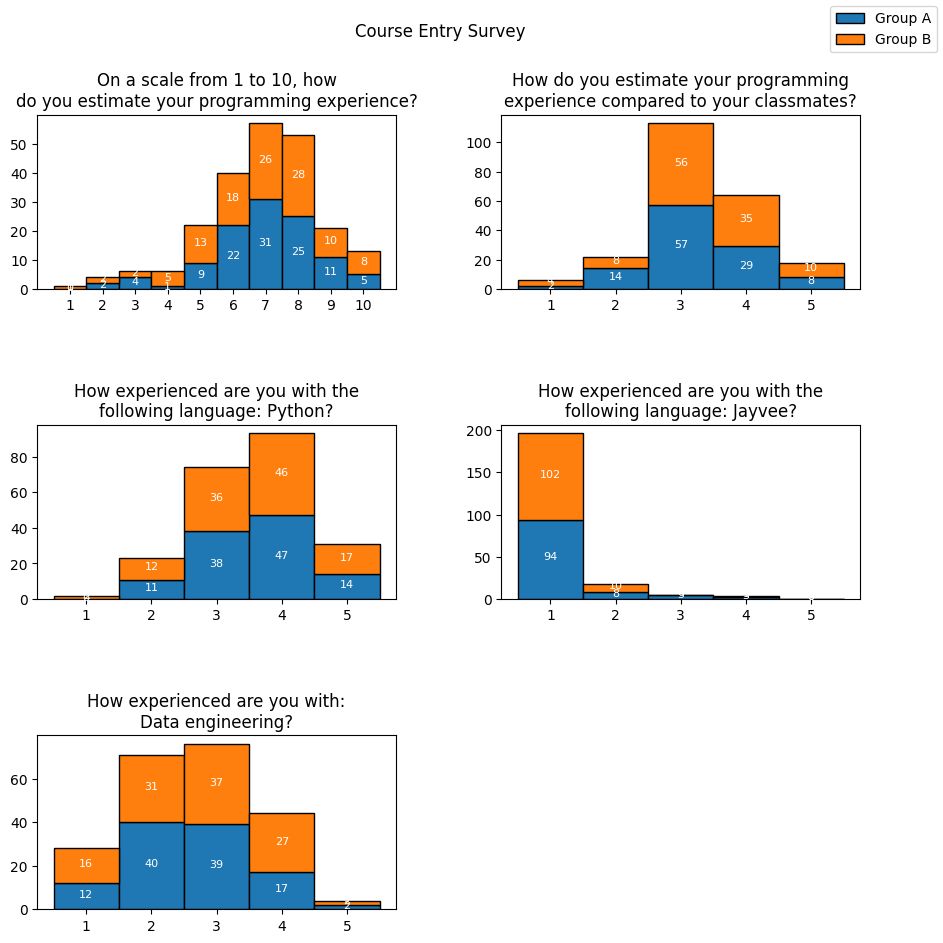

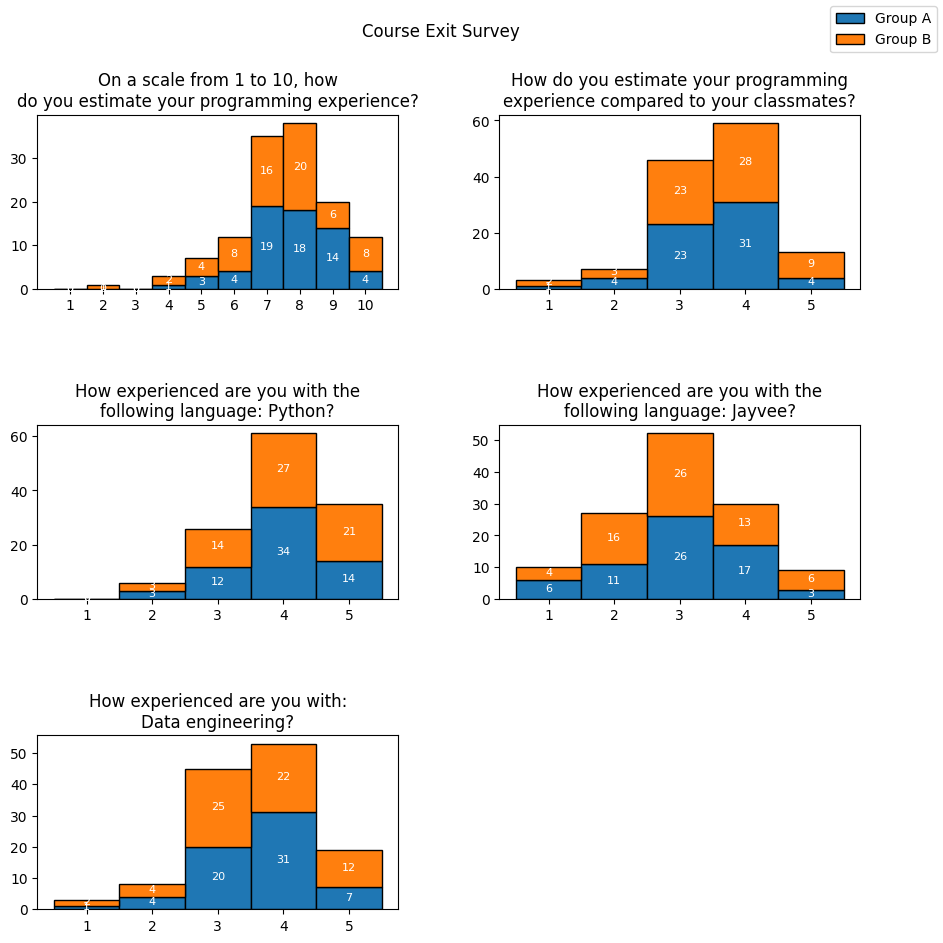

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv(f'{dataRootFolder}/generated/entry-exit-anon.csv',sep=',')

# Feigenspan, J., Kästner, C., Liebig, J., Apel, S., & Hanenberg, S. (2012). Measuring programming experience. 2012 20th IEEE International Conference on Program Comprehension (ICPC), 73–82.
def createHist(dataFrame, ax, question: str, max: int, title: str):
    ax.hist(
        (
            dataFrame[dataFrame['Group'] == 'A'][question],
            dataFrame[dataFrame['Group'] == 'B'][question]
        ),
        stacked=True,
        bins=np.arange(0.5, max + 1, 1),
        align='mid',
        edgecolor = "black", linewidth = 1
        )
    
    for bar in ax.patches:
        ax.text(bar.get_x() + bar.get_width() / 2,
            bar.get_height() / 2 + bar.get_y() - 0.5,
            round(bar.get_height()), ha = 'center',
            color = 'w', size = 8)

    ax.set_title(title)
    ax.set_xticks(np.arange(1, max + 1, 1))

def createSurveyPlot(dataFrame, title):
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(10,10))

    ax1 = createHist(dataFrame, ax1, 'On a scale from 1 to 10, how do you estimate your programming experience?', 10, 'On a scale from 1 to 10, how\ndo you estimate your programming experience?')
    ax2 = createHist(dataFrame, ax2, 'How do you estimate your programming experience compared to your classmates?', 5, 'How do you estimate your programming\nexperience compared to your classmates?')
    ax3 = createHist(dataFrame, ax3, 'How experienced are you with the following language: Python?', 5, 'How experienced are you with the\nfollowing language: Python?')
    ax4 = createHist(dataFrame, ax4, 'How experienced are you with the following language: Jayvee?', 5, 'How experienced are you with the\nfollowing language: Jayvee?')
    ax5 = createHist(dataFrame, ax5, 'How experienced are you with: Data engineering?', 5, 'How experienced are you with:\nData engineering?')

    fig.tight_layout(pad=5.0)
    fig.legend(['Group A', 'Group B'])
    fig.delaxes(ax6)

    plt.suptitle(title)

    return plt

courseEntryPlot = createSurveyPlot(df[df['isExit'] == False], 'Course Entry Survey')
courseEntryPlot.show()

courseExitPlot = createSurveyPlot(df[df['isExit'] == True], 'Course Exit Survey')
courseExitPlot.show()

<Axes: xlabel='language', ylabel='Count'>

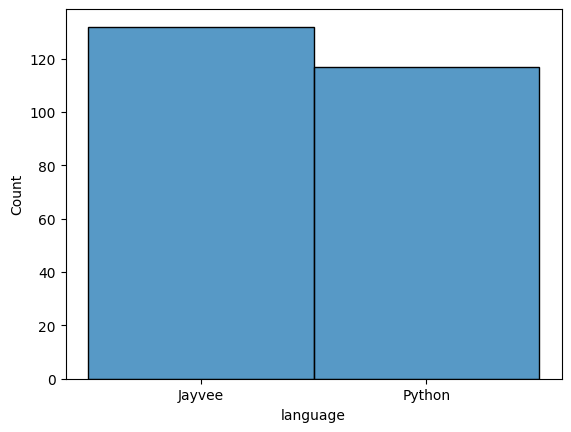

In [4]:
import pandas as pd
import seaborn as sns

responses = pd.read_csv(f'{dataRootFolder}/generated/survey-responses.csv')

sns.histplot(
    data=responses,
    x='language',
    #multiple='stack',
    element='bars',
    #palette=colors,
    #hue='Group',
    legend=False,
    #kde=True,
    discrete=True,
    #shrink=0.8,
    #alpha=0.3
)